Take-home interview solutions for Geospatial Data Analyst role: by Sanidhya Ravikumar

Confirming my Local time and Computer ID at the time of test taken

In [206]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Take-home interview solutions: by Sanidhya Ravikumar')
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Take-home interview solutions: by Sanidhya Ravikumar
Local Time: 2024-12-10 00:58:15
Computer ID: Sanidhyas-MBP.lan


# Datasets used

A) List of countries by vegetable production - https://en.wikipedia.org/wiki/List_of_countries_by_vegetable_production

B) List of countries by population (United Nations) - https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)

C) World countries generalized (Esri Data and Maps) https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore?location=-0.011765%2C0.000000%2C1.68 

# Question 1 

Using the provided data sources, identify the countries with the highest vegetable production per capita. Include the production amount per capita in your findings.

In [207]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [208]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [209]:
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_countries_by_vegetable_production"
tables = pd.read_html(url)
df = tables[0]
print(df.head())


    0                                                  1
0 NaN  This article relies largely or entirely on a s...


In [210]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_vegetable_production"
tables = pd.read_html(url)

# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Preview each table to locate the correct one
for i, table in enumerate(tables):
    print(f"Table {i} preview:")
    print(table.head(), "\n")


Number of tables found: 10
Table 0 preview:
    0                                                  1
0 NaN  This article relies largely or entirely on a s... 

Table 1 preview:
  Rank              Country/Region Vegetable production (tonnes)
0    1  People's Republic of China                     594049398
1    2                       India                     141195036
2    3               United States                      33124467
3    4                      Turkey                      25960714
4    5                     Vietnam                      17002195 

Table 2 preview:
                                                   0  \
0  Year Production 1961 197,671,814 1962 196,715,...   
1                                               Year   
2                                               1961   
3                                               1962   
4                                               1963   

                                                   1  \
0  Year Production 19

In [211]:
# Selecting the correct table with 194 countries
veg_prod_df = tables[1] 
print(veg_prod_df.head())


  Rank              Country/Region Vegetable production (tonnes)
0    1  People's Republic of China                     594049398
1    2                       India                     141195036
2    3               United States                      33124467
3    4                      Turkey                      25960714
4    5                     Vietnam                      17002195


In [212]:
# Rename the columns
veg_prod_df.columns = ['rank', 'country', 'veg_production']

print(veg_prod_df.head())

  rank                     country veg_production
0    1  People's Republic of China      594049398
1    2                       India      141195036
2    3               United States       33124467
3    4                      Turkey       25960714
4    5                     Vietnam       17002195


In [213]:
#Get data types of the columns
data_types = veg_prod_df.dtypes
print(data_types)

rank              object
country           object
veg_production    object
dtype: object


In [214]:
#change data type of veg_production column to make it numeric
veg_prod_df['veg_production'] = pd.to_numeric(veg_prod_df['veg_production'], errors='coerce')

In [215]:
#Confirm data types of the columns
data_types = veg_prod_df.dtypes
print(data_types)

rank               object
country            object
veg_production    float64
dtype: object


In [240]:
# Sort the dataframe by the 'country' column alphabetically
veg_prod_df = veg_prod_df.sort_values(by='country')

print(veg_prod_df.head())

                            rank                      country  veg_production
72   1,000,000–10,000,000 tonnes  1,000,000–10,000,000 tonnes             NaN
172        10,000–100,000 tonnes        10,000–100,000 tonnes             NaN
138     100,000–1,000,000 tonnes     100,000–1,000,000 tonnes             NaN
192                <1,000 tonnes                <1,000 tonnes             NaN
53                            54                  Afghanistan       1822632.0


In [242]:
# Show all rows in geo_df
with pd.option_context('display.max_rows', None):
    print(veg_prod_df)

                            rank                           country  \
72   1,000,000–10,000,000 tonnes       1,000,000–10,000,000 tonnes   
172        10,000–100,000 tonnes             10,000–100,000 tonnes   
138     100,000–1,000,000 tonnes          100,000–1,000,000 tonnes   
192                <1,000 tonnes                     <1,000 tonnes   
53                            54                       Afghanistan   
73                            73                           Albania   
18                            19                           Algeria   
81                            81                            Angola   
193                          190               Antigua and Barbuda   
34                            35                         Argentina   
91                            91                           Armenia   
60                            61                         Australia   
93                            93                           Austria   
56                  

Now loading Population table

In [243]:
import pandas as pd

# URL population dataset
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

# Read all tables from the page
tables = pd.read_html(url)

# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Preview each table to locate the correct one
for i, table in enumerate(tables):
    print(f"Table {i} preview:")
    print(table.head(), "\n")

Number of tables found: 2
Table 0 preview:
  Country or territory  Population (1 July 2022)  Population (1 July 2023)  \
0                World                8021407192                8091734930   
1                India                1425423212                1438069596   
2             China[a]                1425179569                1422584933   
3        United States                 341534046                 343477335   
4            Indonesia                 278830529                 281190067   

  Change (%) UN continental region[1] UN statistical subregion[1]  
0     +0.88%                        –                           –  
1     +0.89%                     Asia               Southern Asia  
2     −0.18%                     Asia                Eastern Asia  
3     +0.57%                 Americas            Northern America  
4     +0.85%                     Asia          South-eastern Asia   

Table 1 preview:
  vteLists of countries by population statistics  \
0        

In [244]:
#Loading the desired population table

population_df = tables[0]  
print(population_df.head())


  Country or territory  Population (1 July 2022)  Population (1 July 2023)  \
0                World                8021407192                8091734930   
1                India                1425423212                1438069596   
2             China[a]                1425179569                1422584933   
3        United States                 341534046                 343477335   
4            Indonesia                 278830529                 281190067   

  Change (%) UN continental region[1] UN statistical subregion[1]  
0     +0.88%                        –                           –  
1     +0.89%                     Asia               Southern Asia  
2     −0.18%                     Asia                Eastern Asia  
3     +0.57%                 Americas            Northern America  
4     +0.85%                     Asia          South-eastern Asia  


In [245]:
# Keep only the desired columns
# Using the 2022 population data as it is the closest to 2020 vegetable production data
population_df = population_df[['Country or territory', 'Population (1 July 2022)']]

# Renaming columns
population_df.columns = ['country', 'population_2022']

print(population_df.head())


         country  population_2022
0          World       8021407192
1          India       1425423212
2       China[a]       1425179569
3  United States        341534046
4      Indonesia        278830529


In [246]:
#Get data types of the columns
data_types = population_df.dtypes
print(data_types)

country            object
population_2022     int64
dtype: object


In [247]:
# Sort the dataframe by the 'country' column alphabetically
population_df = population_df.sort_values(by='country')

print(population_df.head())

                            country  population_2022
36                      Afghanistan         40578842
143                         Albania          2827608
33                          Algeria         45477389
211  American Samoa (United States)            48342
204                         Andorra            79705


In [248]:
# Show all rows in geo_df
with pd.option_context('display.max_rows', None):
    print(population_df)

                                       country  population_2022
36                                 Afghanistan         40578842
143                                    Albania          2827608
33                                     Algeria         45477389
211             American Samoa (United States)            48342
204                                    Andorra            79705
42                                      Angola         35635029
225                  Anguilla (United Kingdom)            14180
201                        Antigua and Barbuda            92840
34                                   Argentina         45407904
140                                    Armenia          2880874
198                        Aruba (Netherlands)           107782
54                                Australia[f]         26200984
99                                     Austria          9064677
94                                  Azerbaijan         10295304
178                                    B

In [38]:
# Loading necessary libraries
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

Loading the Geojson file

In [249]:
# Load the GeoJSON file from the URL
url = "https://opendata.arcgis.com/datasets/esri::world-countries-generalized.geojson"
geo_df = gpd.read_file(url)

# Check the first few rows of the data
print(geo_df.head())

   FID         COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Length  SHAPE_Area  \
0    1     Afghanistan  AF    Afghanistan      AF     50.803210   62.566714   
1    2         Albania  AL        Albania      AL      9.625038    3.073540   
2    3         Algeria  DZ        Algeria      DZ     70.540082  213.513461   
3    4  American Samoa  AS  United States      US      0.600124    0.013720   
4    5         Andorra  AD        Andorra      AD      0.937352    0.055585   

                                            geometry  
0  MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...  
1  MULTIPOLYGON (((19.57083 41.68527, 19.58195 41...  
2  MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8...  
3  MULTIPOLYGON (((-170.74390 -14.37555, -170.749...  
4  MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6...  


In [254]:
# Show all rows in geo_df
with pd.option_context('display.max_rows', None):
    print(geo_df)

     FID                                   COUNTRY ISO  \
0      1                               Afghanistan  AF   
1      2                                   Albania  AL   
2      3                                   Algeria  DZ   
3      4                            American Samoa  AS   
4      5                                   Andorra  AD   
5      6                                    Angola  AO   
6      7                                  Anguilla  AI   
7      8                                Antarctica  AQ   
8      9                       Antigua and Barbuda  AG   
9     10                                 Argentina  AR   
10    11                                   Armenia  AM   
11    12                                     Aruba  AW   
12    13                                 Australia  AU   
13    14                                   Austria  AT   
14    15                                Azerbaijan  AZ   
15    16                                    Azores  PT   
16    17      

Manipulation of the tables starts here - 

In [255]:
#Harmonizing names in the country column
print(veg_prod_df)

                            rank                      country  veg_production
72   1,000,000–10,000,000 tonnes  1,000,000–10,000,000 tonnes             NaN
172        10,000–100,000 tonnes        10,000–100,000 tonnes             NaN
138     100,000–1,000,000 tonnes     100,000–1,000,000 tonnes             NaN
192                <1,000 tonnes                <1,000 tonnes             NaN
53                            54                  Afghanistan       1822632.0
..                           ...                          ...             ...
67                            68                    Venezuela       1221274.0
4                              5                      Vietnam      17002195.0
98                            98                        Yemen        480563.0
102                          102                       Zambia        434774.0
116                          116                     Zimbabwe        228485.0

[198 rows x 3 columns]


In [256]:
# Sort the dataframe by the 'country' column alphabetically
veg_prod_df = veg_prod_df.sort_values(by='country')

print(veg_prod_df.head())

                            rank                      country  veg_production
72   1,000,000–10,000,000 tonnes  1,000,000–10,000,000 tonnes             NaN
172        10,000–100,000 tonnes        10,000–100,000 tonnes             NaN
138     100,000–1,000,000 tonnes     100,000–1,000,000 tonnes             NaN
192                <1,000 tonnes                <1,000 tonnes             NaN
53                            54                  Afghanistan       1822632.0


In [259]:
# Show all rows in Veg_prod_df
with pd.option_context('display.max_rows', None):
    print(veg_prod_df)


                            rank                           country  \
72   1,000,000–10,000,000 tonnes       1,000,000–10,000,000 tonnes   
172        10,000–100,000 tonnes             10,000–100,000 tonnes   
138     100,000–1,000,000 tonnes          100,000–1,000,000 tonnes   
192                <1,000 tonnes                     <1,000 tonnes   
53                            54                       Afghanistan   
73                            73                           Albania   
18                            19                           Algeria   
81                            81                            Angola   
193                          190               Antigua and Barbuda   
34                            35                         Argentina   
91                            91                           Armenia   
60                            61                         Australia   
93                            93                           Austria   
56                  

I'm first cleaning the Vegetable production table, getting it to align with the geo_df table

In [260]:
# Dictionary for country name replacements. Changing the names in Veg_prod_df to match the country names in geo_df
name_changes = {
    "Cape Verde": "Cabo Verde",
    "Brunei": "Brunei Darussalam",
    "Democratic Republic of the Congo": "Congo DRC",
    "Republic of the Congo": "Congo",
    "Federated States of Micronesia": "Micronesia", 
    "Palestine": "Palestinian Territory",
    "People's Republic of China": "China",
    "Russia": "Russian Federation",
    "São Tomé and Príncipe": "Sao Tome and Principe"
}

# Replace country names
veg_prod_df['country'] = veg_prod_df['country'].replace(name_changes)

print(veg_prod_df)

                            rank                      country  veg_production
72   1,000,000–10,000,000 tonnes  1,000,000–10,000,000 tonnes             NaN
172        10,000–100,000 tonnes        10,000–100,000 tonnes             NaN
138     100,000–1,000,000 tonnes     100,000–1,000,000 tonnes             NaN
192                <1,000 tonnes                <1,000 tonnes             NaN
53                            54                  Afghanistan       1822632.0
..                           ...                          ...             ...
67                            68                    Venezuela       1221274.0
4                              5                      Vietnam      17002195.0
98                            98                        Yemen        480563.0
102                          102                       Zambia        434774.0
116                          116                     Zimbabwe        228485.0

[198 rows x 3 columns]


In [264]:
# Sort the dataframe by the 'country' column alphabetically
veg_prod_df = veg_prod_df.sort_values(by='country')

print(veg_prod_df.head())


                            rank                      country  veg_production
72   1,000,000–10,000,000 tonnes  1,000,000–10,000,000 tonnes             NaN
172        10,000–100,000 tonnes        10,000–100,000 tonnes             NaN
138     100,000–1,000,000 tonnes     100,000–1,000,000 tonnes             NaN
192                <1,000 tonnes                <1,000 tonnes             NaN
53                            54                  Afghanistan       1822632.0


In [266]:
#Dsiplay all rows in veg_prod_df Final
with pd.option_context('display.max_rows', None):
    print(veg_prod_df)

                            rank                           country  \
72   1,000,000–10,000,000 tonnes       1,000,000–10,000,000 tonnes   
172        10,000–100,000 tonnes             10,000–100,000 tonnes   
138     100,000–1,000,000 tonnes          100,000–1,000,000 tonnes   
192                <1,000 tonnes                     <1,000 tonnes   
53                            54                       Afghanistan   
73                            73                           Albania   
18                            19                           Algeria   
81                            81                            Angola   
193                          190               Antigua and Barbuda   
34                            35                         Argentina   
91                            91                           Armenia   
60                            61                         Australia   
93                            93                           Austria   
56                  

In [268]:
# Sort the dataframe by the 'country' column alphabetically
population_df = population_df.sort_values(by='country')

print(population_df.head())

                            country  population_2022
36                      Afghanistan         40578842
143                         Albania          2827608
33                          Algeria         45477389
211  American Samoa (United States)            48342
204                         Andorra            79705


In [269]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(population_df)

                                       country  population_2022
36                                 Afghanistan         40578842
143                                    Albania          2827608
33                                     Algeria         45477389
211             American Samoa (United States)            48342
204                                    Andorra            79705
42                                      Angola         35635029
225                  Anguilla (United Kingdom)            14180
201                        Antigua and Barbuda            92840
34                                   Argentina         45407904
140                                    Armenia          2880874
198                        Aruba (Netherlands)           107782
54                                Australia[f]         26200984
99                                     Austria          9064677
94                                  Azerbaijan         10295304
178                                    B

Now I'm manipulating the population table to make it align with the vegetable production table

In [270]:
# Adding the population of all United Kingdom territories and appending 
# Identify UK-related rows more accurately
uk_related = population_df[population_df['country'].str.contains("United Kingdom", na=False)]

print(uk_related)


                                       country  population_2022
225                  Anguilla (United Kingdom)            14180
207                   Bermuda (United Kingdom)            64749
217    British Virgin Islands (United Kingdom)            38319
205            Cayman Islands (United Kingdom)            71591
234          Falkland Islands (United Kingdom)             3490
219                 Gibraltar (United Kingdom)            37609
208                  Guernsey (United Kingdom)            63725
203               Isle of Man (United Kingdom)            84132
199                    Jersey (United Kingdom)           103490
233                Montserrat (United Kingdom)             4453
232           Saint Helena (United Kingdom)[w]             5343
213  Turks and Caicos Islands (United Kingdom)            45847
21                              United Kingdom         68179315


In [271]:
# Sum the population of these rows
total_population_uk = uk_related['population_2022'].sum()
print(total_population_uk)

68716243


In [272]:
# Create a new row for the United Kingdom
new_row = pd.DataFrame({'country': ['United Kingdom'], 'population_2022': [total_population_uk]})

# Remove original UK-related rows
population_df = population_df[~population_df['country'].str.contains("United Kingdom", na=False)]

# Add the new row
population_df = pd.concat([population_df, new_row], ignore_index=True)

print(population_df)

                            country  population_2022
0                       Afghanistan         40578842
1                           Albania          2827608
2                           Algeria         45477389
3    American Samoa (United States)            48342
4                           Andorra            79705
..                              ...              ...
221                           World       8021407192
222                           Yemen         38222876
223                          Zambia         20152938
224                        Zimbabwe         16069056
225                  United Kingdom         68716243

[226 rows x 2 columns]


In [273]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(population_df)

                                      country  population_2022
0                                 Afghanistan         40578842
1                                     Albania          2827608
2                                     Algeria         45477389
3              American Samoa (United States)            48342
4                                     Andorra            79705
5                                      Angola         35635029
6                         Antigua and Barbuda            92840
7                                   Argentina         45407904
8                                     Armenia          2880874
9                         Aruba (Netherlands)           107782
10                               Australia[f]         26200984
11                                    Austria          9064677
12                                 Azerbaijan         10295304
13                                    Bahamas           397538
14                                    Bahrain          

In [274]:
#Using conditional filtering, aggregation and concatentation to do the same for United States, Denmark, France, Netherlands and New Zealand
# List of countries to combine
countries_to_combine = ['United States', 'Denmark', 'France', 'Netherlands', 'New Zealand']

# Loop through the countries and combine populations
for country in countries_to_combine:
    # Identify rows for the specific country
    country_related = population_df[population_df['country'].str.contains(country, na=False)]

    # Sum the population for these rows
    total_population = country_related['population_2022'].sum()

    # Create a new row for the country
    new_row = pd.DataFrame({'country': [country], 'population_2022': [total_population]})

    # Remove the original rows for this country
    population_df = population_df[~population_df['country'].str.contains(country, na=False)]

    # Add the new row
    population_df = pd.concat([population_df, new_row], ignore_index=True)

print(population_df)


           country  population_2022
0      Afghanistan         40578842
1          Albania          2827608
2          Algeria         45477389
3          Andorra            79705
4           Angola         35635029
..             ...              ...
196  United States        345121121
197        Denmark          6011905
198         France         69111181
199    Netherlands         18268314
200    New Zealand          5150568

[201 rows x 2 columns]


In [275]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(population_df)

                              country  population_2022
0                         Afghanistan         40578842
1                             Albania          2827608
2                             Algeria         45477389
3                             Andorra            79705
4                              Angola         35635029
5                 Antigua and Barbuda            92840
6                           Argentina         45407904
7                             Armenia          2880874
8                        Australia[f]         26200984
9                             Austria          9064677
10                         Azerbaijan         10295304
11                            Bahamas           397538
12                            Bahrain          1533459
13                         Bangladesh        169384897
14                           Barbados           288318
15                            Belarus          9173237
16                            Belgium         11641820
17        

Now Harmonizing population table with respect to veg production table

In [276]:
# Dictionary for country name corrections in population_df table
#Changing DR Congo to Congo as 'Congo' here relates to Democratic Republic of Congo and not PRC
name_corrections = {
    "Australia[f]": "Australia",
    "Cyprus[s]": "Cyprus",
    "China[a]": "China",
    "Finland[m]": "Finland",
    "Norway[n]": "Norway",
    "Hong Kong (China)[k]": "Hong Kong",
    "Georgia[p]": "Georgia",
    "Kosovo[r]": "Kosovo",
    "Macao (China)[t]": "Macao",
    "Moldova[q]": "Moldova",
    "Palestine[o]": "Palestinian Territory",
    "Portugal[j]": "Portugal",
    "Serbia[l]": "Serbia",
    "Somalia[h]": "Somalia",
    "Spain[d]": "Spain",
    "Taiwan[g]": "Taiwan",
    "Tanzania[b]": "Tanzania",
    "Ukraine[e]": "Ukraine",
    "Vatican City[x]": "Vatican City",
    "Brunei": "Brunei Darussalam",
    "Cape Verde": "Cabo Verde",
    #"Congo": "PRC",
    "DR Congo": "Congo DRC",
    "Czechia": "Czech Republic",
    "Russia": "Russian Federation",
    "São Tomé and Príncipe": "Sao Tome and Principe"
   
}

# Apply the corrections and save it to a new dataframe
population_df_updated = population_df.copy()
population_df_updated['country'] = population_df_updated['country'].replace(name_corrections)

print(population_df_updated.head())

       country  population_2022
0  Afghanistan         40578842
1      Albania          2827608
2      Algeria         45477389
3      Andorra            79705
4       Angola         35635029


In [277]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(population_df_updated)

                              country  population_2022
0                         Afghanistan         40578842
1                             Albania          2827608
2                             Algeria         45477389
3                             Andorra            79705
4                              Angola         35635029
5                 Antigua and Barbuda            92840
6                           Argentina         45407904
7                             Armenia          2880874
8                           Australia         26200984
9                             Austria          9064677
10                         Azerbaijan         10295304
11                            Bahamas           397538
12                            Bahrain          1533459
13                         Bangladesh        169384897
14                           Barbados           288318
15                            Belarus          9173237
16                            Belgium         11641820
17        

In [278]:
#Adding Macau with China as it is not identified as separate country in the veg_production_table

# Filter for the population of Macao
macao_population = population_df_updated.loc[population_df_updated['country'] == 'Macao', 'population_2022'].sum()

# Add Macao's population to China's population
population_df_updated.loc[population_df_updated['country'] == 'China', 'population_2022'] += macao_population

print(macao_population)


704356


In [279]:
# Drop the row for Macao
population_df_updated = population_df_updated[population_df_updated['country'] != 'Macao']

# Reset the index for the updated DataFrame
population_df_updated.reset_index(drop=True, inplace=True)

print(population_df_updated)

           country  population_2022
0      Afghanistan         40578842
1          Albania          2827608
2          Algeria         45477389
3          Andorra            79705
4           Angola         35635029
..             ...              ...
195  United States        345121121
196        Denmark          6011905
197         France         69111181
198    Netherlands         18268314
199    New Zealand          5150568

[200 rows x 2 columns]


In [280]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(population_df_updated)

                              country  population_2022
0                         Afghanistan         40578842
1                             Albania          2827608
2                             Algeria         45477389
3                             Andorra            79705
4                              Angola         35635029
5                 Antigua and Barbuda            92840
6                           Argentina         45407904
7                             Armenia          2880874
8                           Australia         26200984
9                             Austria          9064677
10                         Azerbaijan         10295304
11                            Bahamas           397538
12                            Bahrain          1533459
13                         Bangladesh        169384897
14                           Barbados           288318
15                            Belarus          9173237
16                            Belgium         11641820
17        

In [281]:
# Merge the dataframes on 'country'
merged_df = pd.merge(veg_prod_df, population_df_updated, on='country', how='inner')

# Display the merged dataframe
print(merged_df.head())

  rank              country  veg_production  population_2022
0   54          Afghanistan       1822632.0         40578842
1   73              Albania        988507.0          2827608
2   19              Algeria       7986465.0         45477389
3   81               Angola        743741.0         35635029
4  190  Antigua and Barbuda           847.0            92840


In [282]:
# Identify unmatched countries
unmatched_countries = veg_prod_df[~veg_prod_df['country'].isin(population_df_updated['country'])]
print("Unmatched Countries:")
print(unmatched_countries['country'].unique())


Unmatched Countries:
['1,000,000–10,000,000 tonnes' '10,000–100,000 tonnes'
 '100,000–1,000,000 tonnes' '<1,000 tonnes' 'Cook Islands'
 'French Polynesia' 'New Caledonia' 'Niue' 'Puerto Rico' 'Timor-Leste']


The above mentioned countries do not have a record in the World Population table

In [283]:
# Ensure numeric types for calculations
merged_df['veg_production'] = pd.to_numeric(merged_df['veg_production'], errors='coerce')
merged_df['population_2022'] = pd.to_numeric(merged_df['population_2022'], errors='coerce')

# Calculate production per capita
merged_df['production_per_capita'] = merged_df['veg_production'] / merged_df['population_2022']

# Handle any infinite or NaN values
merged_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
merged_df.dropna(subset=['production_per_capita'], inplace=True)

# Display the updated dataframe
print(merged_df[['country', 'veg_production', 'population_2022', 'production_per_capita']].head())


               country  veg_production  population_2022  production_per_capita
0          Afghanistan       1822632.0         40578842               0.044916
1              Albania        988507.0          2827608               0.349591
2              Algeria       7986465.0         45477389               0.175614
3               Angola        743741.0         35635029               0.020871
4  Antigua and Barbuda           847.0            92840               0.009123


In [284]:
# Sort the dataframe in descending order of production per capita
sorted_df = merged_df.sort_values(by='production_per_capita', ascending=False)

# Add a ranking column
sorted_df['rank'] = range(1, len(sorted_df) + 1)

# Select all columns for all countries
print("Countries Ranked by Vegetable Production Per Capita:")
print(sorted_df[['rank', 'country', 'production_per_capita']])


Countries Ranked by Vegetable Production Per Capita:
     rank          country  production_per_capita
34      1            China               0.416618
123     2  North Macedonia               0.378170
1       3          Albania               0.349591
172     4           Turkey               0.298199
117     5      Netherlands               0.289744
..    ...              ...                    ...
101   184         Maldives               0.004982
71    185        Hong Kong               0.004872
59    186           Gambia               0.004866
149   187        Singapore               0.004526
104   188       Mauritania               0.000983

[188 rows x 3 columns]


In [285]:
sorted_df['country'] = sorted_df['country'].replace('Turkey', 'Turkiye')

In [286]:
print(sorted_df)

     rank          country  veg_production  population_2022  \
34      1            China     594049398.0       1425883925   
123     2  North Macedonia        695920.0          1840233   
1       3          Albania        988507.0          2827608   
172     4          Turkiye      25960714.0         87058473   
117     5      Netherlands       5293140.0         18268314   
..    ...              ...             ...              ...   
101   184         Maldives          2611.0           524106   
71    185        Hong Kong         36371.0          7465915   
59    186           Gambia         12828.0          2636470   
149   187        Singapore         25569.0          5649885   
104   188       Mauritania          4794.0          4875637   

     production_per_capita  
34                0.416618  
123               0.378170  
1                 0.349591  
172               0.298199  
117               0.289744  
..                     ...  
101               0.004982  
71         

In [287]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(sorted_df[['rank', 'country', 'production_per_capita']])


     rank                           country  production_per_capita
34      1                             China               0.416618
123     2                   North Macedonia               0.378170
1       3                           Albania               0.349591
172     4                           Turkiye               0.298199
117     5                       Netherlands               0.289744
181     6                        Uzbekistan               0.283458
157     7                             Spain               0.264880
169     8                             Tonga               0.260086
171     9                           Tunisia               0.258955
20     10            Bosnia and Herzegovina               0.249526
68     11                            Guyana               0.236553
176    12                           Ukraine               0.235705
165    13                        Tajikistan               0.233209
85     14                        Kazakhstan               0.22

In [330]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(sorted_df)

     rank                           country  veg_production  population_2022  \
34      1                             China     594049398.0       1425883925   
123     2                   North Macedonia        695920.0          1840233   
1       3                           Albania        988507.0          2827608   
172     4                           Turkiye      25960714.0         87058473   
117     5                       Netherlands       5293140.0         18268314   
181     6                        Uzbekistan       9903740.0         34938955   
157     7                             Spain      12668790.0         47828382   
169     8                             Tonga         27320.0           105042   
171     9                           Tunisia       3138362.0         12119334   
20     10            Bosnia and Herzegovina        799683.0          3204802   
68     11                            Guyana        194361.0           821637   
176    12                           Ukra

In [332]:
sorted_df.to_excel('vegetable_production_table.xlsx', index=False)

# Question 2

Create a visualization that maps the total and per capita vegetable production across all countries. Ensure the map is clear and provides insights into geographic production trends.

In [138]:
pip install plotly pandas


Note: you may need to restart the kernel to use updated packages.


In [288]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merging sorted_df with geo_df on country name
geo_merged = geo_df.merge(sorted_df, left_on='COUNTRY', right_on='country', how='left')

print(geo_merged.head())


   FID         COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Length  SHAPE_Area  \
0    1     Afghanistan  AF    Afghanistan      AF     50.803210   62.566714   
1    2         Albania  AL        Albania      AL      9.625038    3.073540   
2    3         Algeria  DZ        Algeria      DZ     70.540082  213.513461   
3    4  American Samoa  AS  United States      US      0.600124    0.013720   
4    5         Andorra  AD        Andorra      AD      0.937352    0.055585   

                                            geometry  rank      country  \
0  MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...  99.0  Afghanistan   
1  MULTIPOLYGON (((19.57083 41.68527, 19.58195 41...   3.0      Albania   
2  MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8...  24.0      Algeria   
3  MULTIPOLYGON (((-170.74390 -14.37555, -170.749...   NaN          NaN   
4  MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6...   NaN          NaN   

   veg_production  population_2022  production_per_capita  
0       182263

In [291]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(geo_merged)

     FID                                   COUNTRY ISO  \
0      1                               Afghanistan  AF   
1      2                                   Albania  AL   
2      3                                   Algeria  DZ   
3      4                            American Samoa  AS   
4      5                                   Andorra  AD   
5      6                                    Angola  AO   
6      7                                  Anguilla  AI   
7      8                                Antarctica  AQ   
8      9                       Antigua and Barbuda  AG   
9     10                                 Argentina  AR   
10    11                                   Armenia  AM   
11    12                                     Aruba  AW   
12    13                                 Australia  AU   
13    14                                   Austria  AT   
14    15                                Azerbaijan  AZ   
15    16                                    Azores  PT   
16    17      

In [292]:
# Check matching rates for COUNTRY
geo_countries = geo_df['COUNTRY']
sorted_countries = sorted_df['country']
country_matches = sorted_countries.isin(geo_countries).sum()
print(f"Matches with COUNTRY column: {country_matches} out of {len(sorted_countries)}")

# Check matching rates for COUNTRYAFF
geo_countries_aff = geo_df['COUNTRYAFF']
country_aff_matches = sorted_countries.isin(geo_countries_aff).sum()
print(f"Matches with COUNTRYAFF column: {country_aff_matches} out of {len(sorted_countries)}")


Matches with COUNTRY column: 185 out of 188
Matches with COUNTRYAFF column: 170 out of 188


In [293]:
#Checking unmatched countries
unmatched = sorted_df[~sorted_df['country'].isin(geo_df['COUNTRY'])]
print(unmatched)

     rank      country  veg_production  population_2022  production_per_capita
164    55       Taiwan       2080502.0         23420111               0.088834
81    138  Ivory Coast        770581.0         30395002               0.025352
71    185    Hong Kong         36371.0          7465915               0.004872


In [294]:
# Checking if these countries are missing from tht geo_df table
missing_countries = ["Turkey", "Taiwan", "Ivory Coast", "Hong Kong"]

for col in ['COUNTRY', 'COUNTRYAFF']:
    print(f"Checking column: {col}")
    print(geo_df[geo_df[col].isin(missing_countries)])


Checking column: COUNTRY
Empty GeoDataFrame
Columns: [FID, COUNTRY, ISO, COUNTRYAFF, AFF_ISO, SHAPE_Length, SHAPE_Area, geometry]
Index: []
Checking column: COUNTRYAFF
Empty GeoDataFrame
Columns: [FID, COUNTRY, ISO, COUNTRYAFF, AFF_ISO, SHAPE_Length, SHAPE_Area, geometry]
Index: []


In [295]:
#CHecking if these countries are missing from the sorted_df
print(sorted_df[sorted_df['country'].isin(missing_countries)])


     rank      country  veg_production  population_2022  production_per_capita
164    55       Taiwan       2080502.0         23420111               0.088834
81    138  Ivory Coast        770581.0         30395002               0.025352
71    185    Hong Kong         36371.0          7465915               0.004872


The above 3 countries dont have a record in the geo_df (geojson) dataset

In [175]:
import seaborn as sns

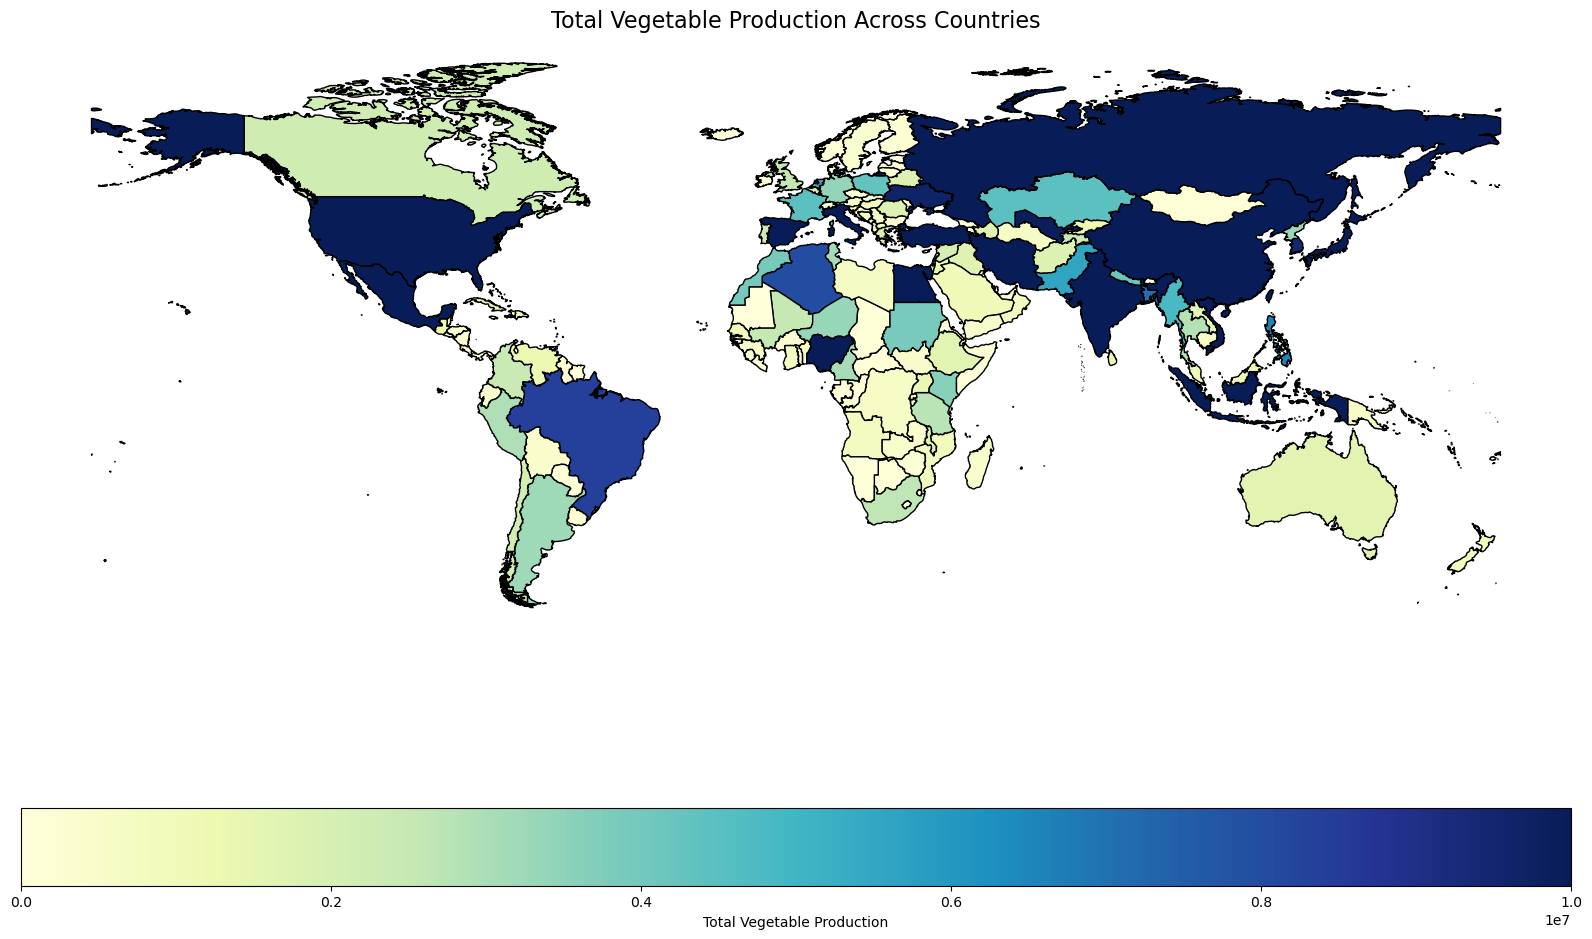

In [347]:
# Plot total vegetable production
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot the map, coloring based on total vegetable production
geo_merged.plot(column='veg_production', ax=ax, legend=True,
               legend_kwds={'label': "Total Vegetable Production",
                            'orientation': "horizontal"},
               cmap='YlGnBu', edgecolor='black', vmin=0, vmax=10000000)

# Title and labels
ax.set_title('Total Vegetable Production Across Countries', fontsize=16)
ax.set_axis_off()

plt.show()


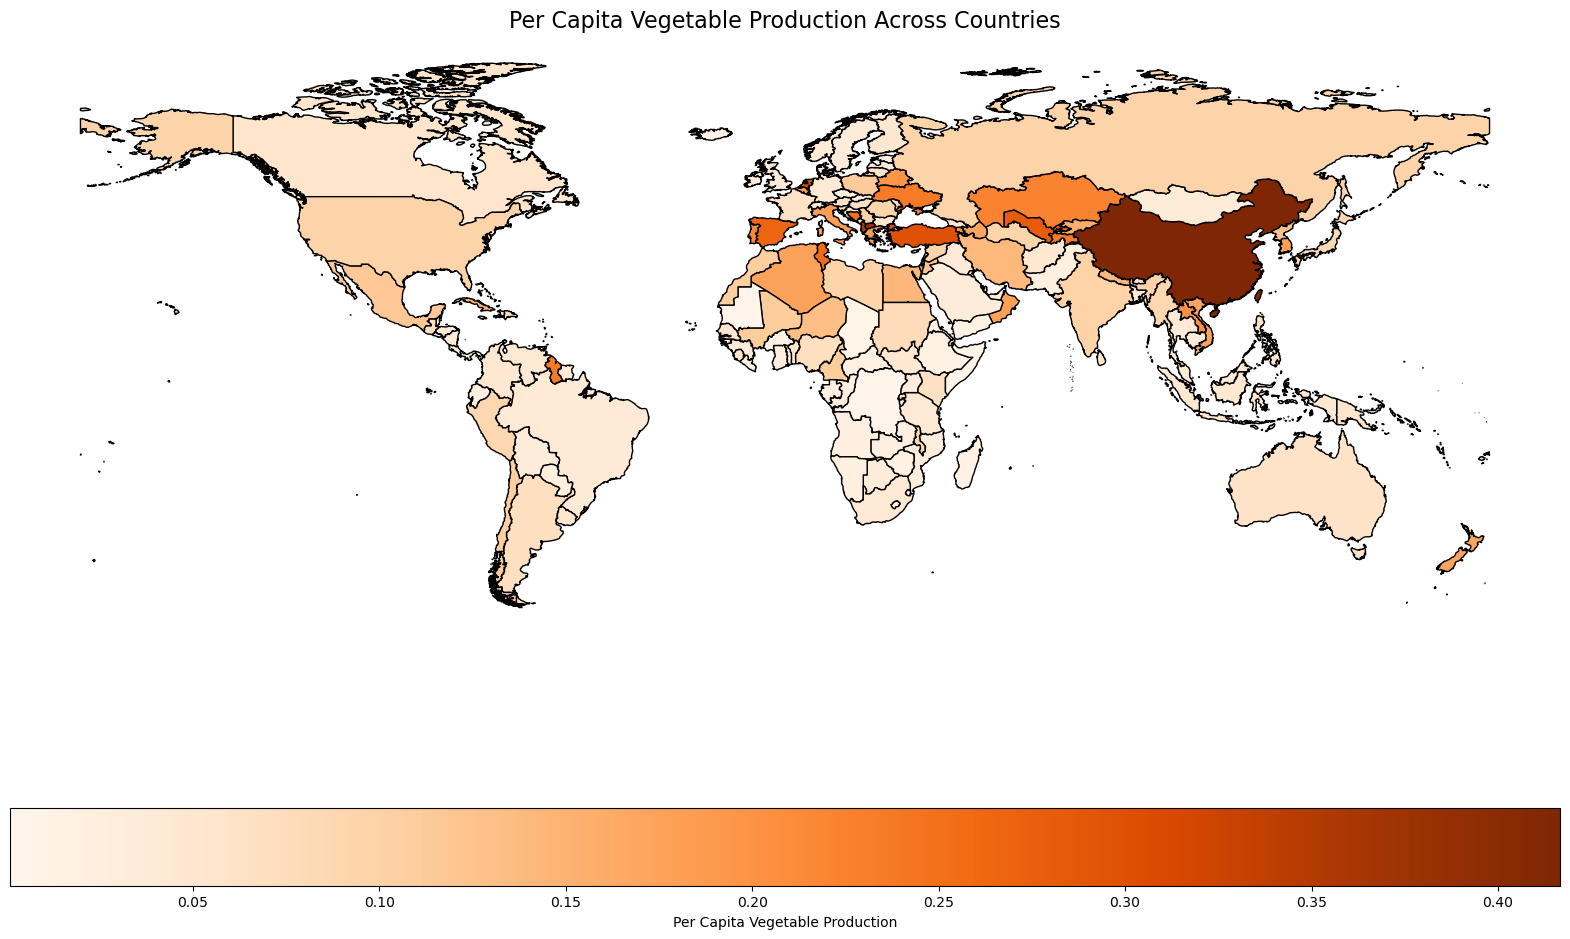

In [358]:
# Plot per capita vegetable production
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot the map, coloring based on per capita vegetable production
geo_merged.plot(column='production_per_capita', ax=ax, legend=True,
               legend_kwds={'label': "Per Capita Vegetable Production",
                            'orientation': "horizontal"},
               cmap='Oranges', edgecolor='black')

# Title and labels
ax.set_title('Per Capita Vegetable Production Across Countries', fontsize=16)
ax.set_axis_off()

plt.show()


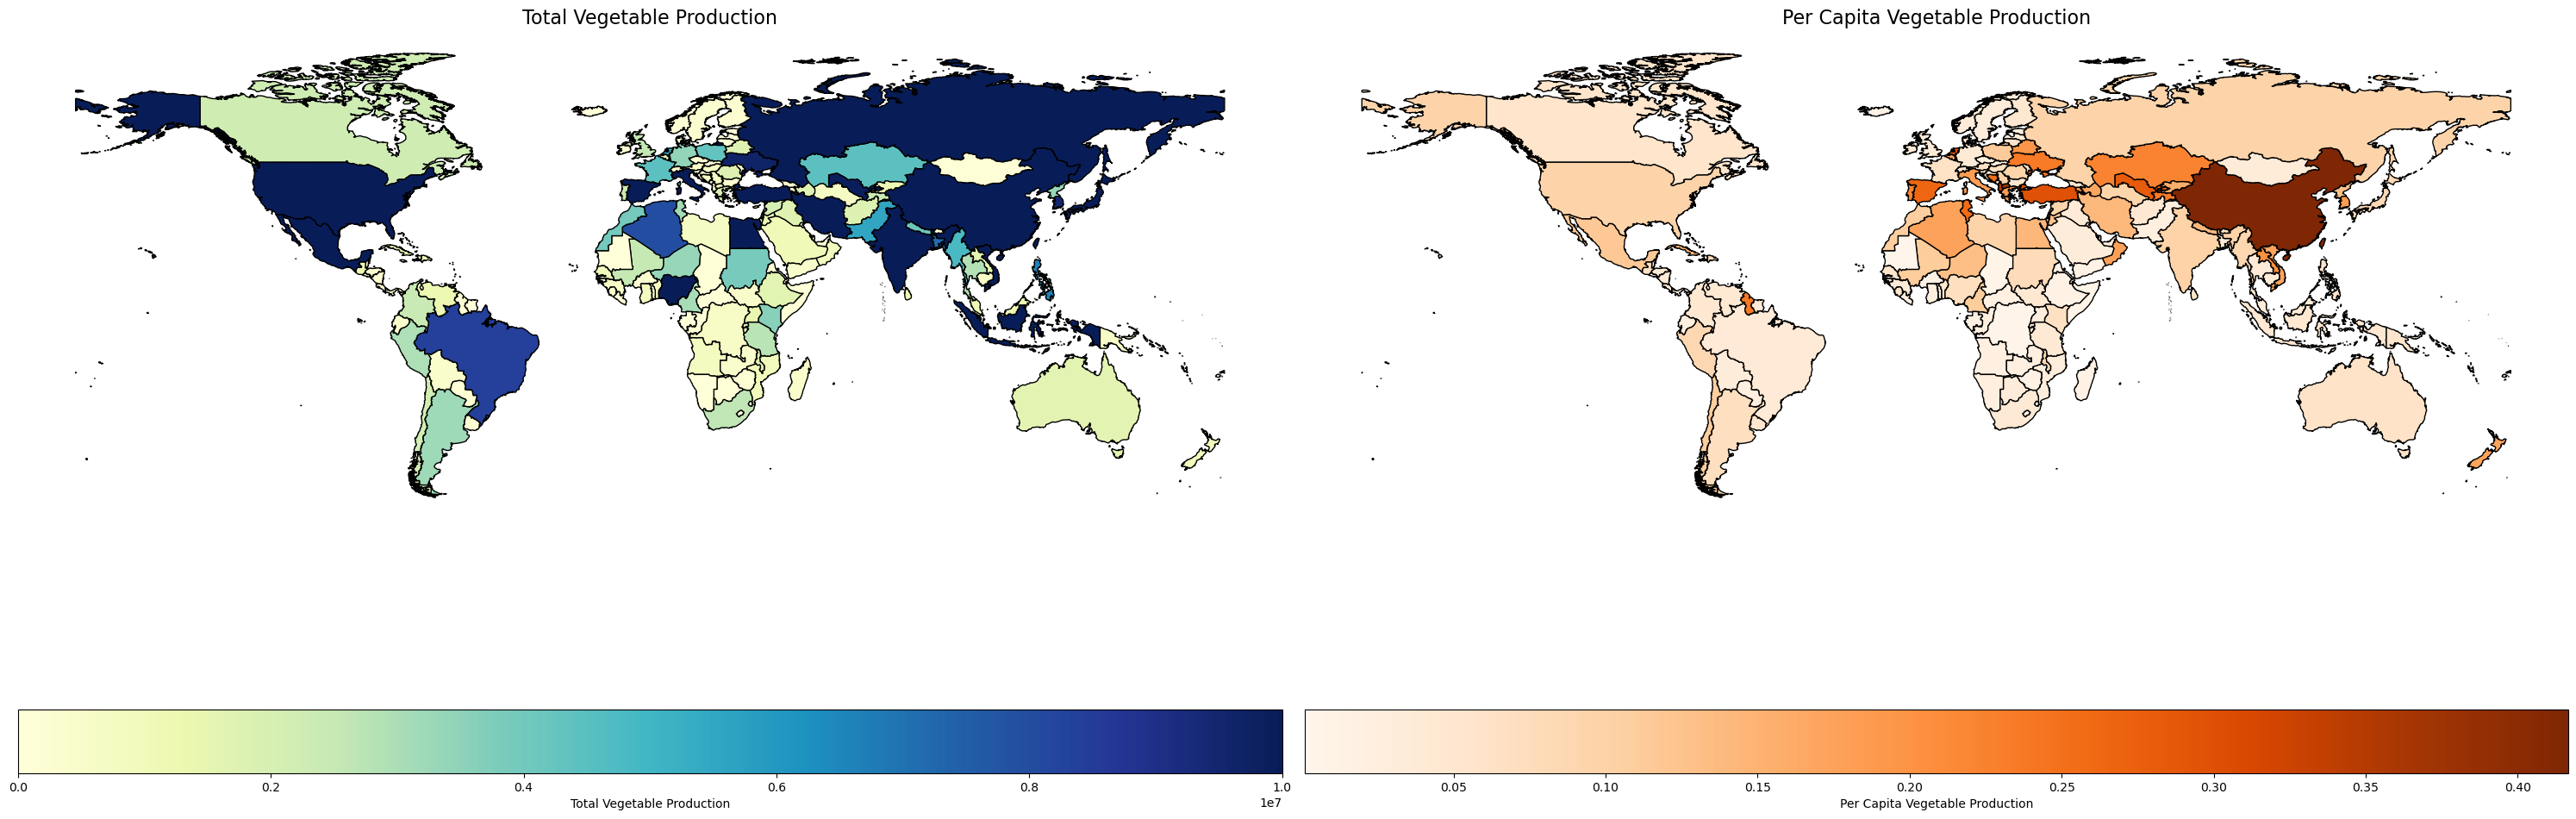

In [359]:
# Create a side-by-side plot for both total and per capita production
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

# Plot total vegetable production on the left
geo_merged.plot(column='veg_production', ax=axes[0], legend=True,
               legend_kwds={'label': "Total Vegetable Production",
                            'orientation': "horizontal"},
               cmap='YlGnBu', edgecolor='black', vmin=0, vmax=10000000)
axes[0].set_title('Total Vegetable Production', fontsize=16)
axes[0].set_axis_off()

# Plot per capita vegetable production on the right
geo_merged.plot(column='production_per_capita', ax=axes[1], legend=True,
               legend_kwds={'label': "Per Capita Vegetable Production",
                            'orientation': "horizontal"},
               cmap='Oranges', edgecolor='black')
axes[1].set_title('Per Capita Vegetable Production', fontsize=16)
axes[1].set_axis_off()

plt.tight_layout()
plt.show()


In [315]:
print(geo_merged.head())


   FID         COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Length  SHAPE_Area  \
0    1     Afghanistan  AF    Afghanistan      AF     50.803210   62.566714   
1    2         Albania  AL        Albania      AL      9.625038    3.073540   
2    3         Algeria  DZ        Algeria      DZ     70.540082  213.513461   
3    4  American Samoa  AS  United States      US      0.600124    0.013720   
4    5         Andorra  AD        Andorra      AD      0.937352    0.055585   

                                            geometry  rank      country  \
0  MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...  99.0  Afghanistan   
1  MULTIPOLYGON (((19.57083 41.68527, 19.58195 41...   3.0      Albania   
2  MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8...  24.0      Algeria   
3  MULTIPOLYGON (((-170.74390 -14.37555, -170.749...   NaN          NaN   
4  MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6...   NaN          NaN   

   veg_production  population_2022  production_per_capita  
0       182263

In [360]:
#Display all rows
with pd.option_context('display.max_rows', None):
    print(geo_merged)

     FID                                   COUNTRY ISO  \
0      1                               Afghanistan  AF   
1      2                                   Albania  AL   
2      3                                   Algeria  DZ   
3      4                            American Samoa  AS   
4      5                                   Andorra  AD   
5      6                                    Angola  AO   
6      7                                  Anguilla  AI   
7      8                                Antarctica  AQ   
8      9                       Antigua and Barbuda  AG   
9     10                                 Argentina  AR   
10    11                                   Armenia  AM   
11    12                                     Aruba  AW   
12    13                                 Australia  AU   
13    14                                   Austria  AT   
14    15                                Azerbaijan  AZ   
15    16                                    Azores  PT   
16    17      

The End